<center>
    <font size=5>
        Centro Universitário da FEI<br>
        Mestrado em Engenharia Elétrica - Disciplina de Visão Computacional<br>
        Prof. Dr. Paulo Sérgio<br><br>
        Primeira Lista de Exercícios<br>
        Pensando em Problemas de Calibração de Câmeras
    </font>
</center>

Esse note tem em sua referência o aprendizado em Visão Computacional. Assim todos os exercícios contido aqui, será utilizado como forma de avaliação da disciplina de Visão Computacional do curso de Mestrado em Engenharia Elétrica do Centro Universitário da FEI. 

---

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import NoNorm
from skimage.feature import hog
from skimage import exposure

%matplotlib inline

In [2]:
def scale_zero_to_one(img):
    return (img-img.min())/(img.max()-img.min())

### 6. Discuta o limite do efeito de aplicar repetidamente um filtro 3 x 3 passa-baixa em uma imagem digital

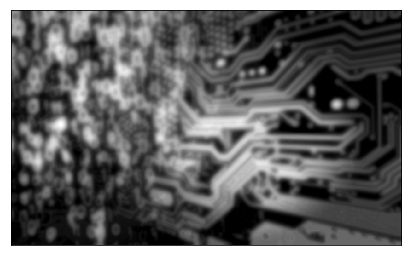

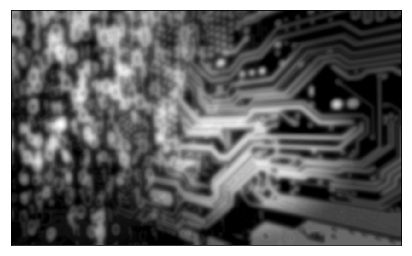

In [9]:
img = cv2.imread('Images/circuit.jpeg', 0)
img_copy = img
for i in range(1000):
    img_copy = cv2.blur(img_copy, (3,3))
    if i==98 or i==99:
        plt.figure(figsize=(7,7))
        plt.xticks([]), plt.yticks([])
        plt.imshow(img_copy, cmap='gray')
        plt.show()

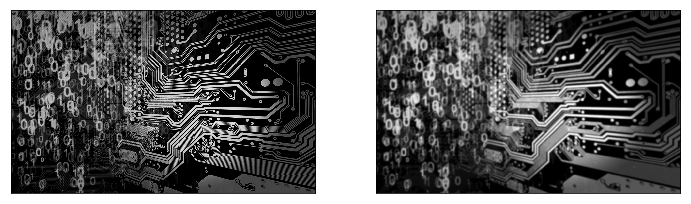

In [4]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_copy, cmap='gray')

plt.show()

### 7. Considerando uma imagem binária (tipo tabuleiro de xadrez)

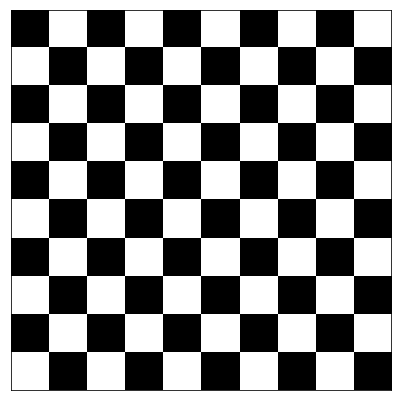

In [3]:
chess = cv2.imread('Images/chess.png', cv2.IMREAD_GRAYSCALE)
#chess = cv2.imread('Images/DIP3E_Original_Images_CH03/Fig0316(3)(third_from_top).tif', cv2.IMREAD_GRAYSCALE)
#chess = cv2.cvtColor(chess, cv2.COLOR_RGB2GRAY)
_, chess = cv2.threshold(chess, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(7,7))
plt.xticks([]), plt.yticks([])
plt.imshow(chess, cmap='gray')
plt.savefig('Results/7_original.png')
plt.show()

# Imagem Original

a. Histograma de direções calculados com o filtro Sobel.

In [4]:
def Sobel_filter(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # filtro Sobel vertical
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # filtro Sobel horizontal
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    #grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    grad = cv2.add(abs_grad_x, abs_grad_y)
    
    return abs_grad_x, abs_grad_y, grad

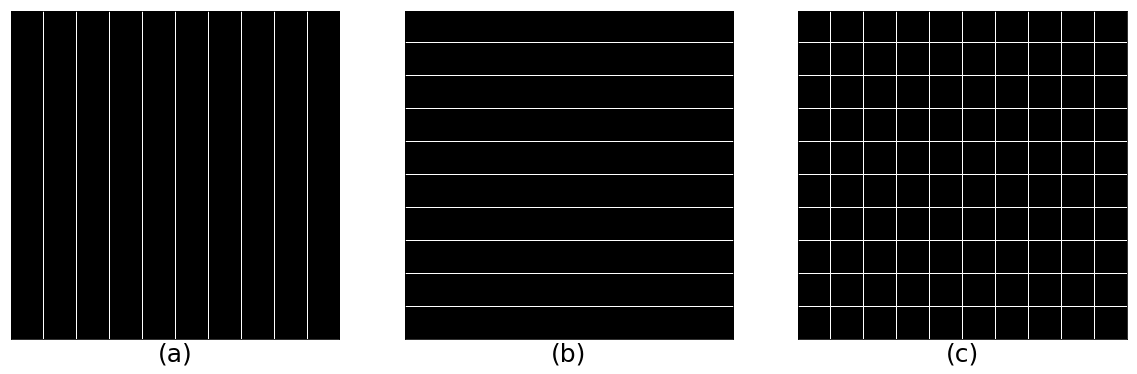

In [5]:
grad_x, grad_y, grad = Sobel_filter(chess)

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.xlabel('(a)', fontsize=25), plt.xticks([]), plt.yticks([])
plt.imshow(grad_x, cmap='gray')

plt.subplot(1,3,2)
plt.xlabel('(b)', fontsize=25), plt.xticks([]), plt.yticks([])
plt.imshow(grad_y, cmap='gray')

plt.subplot(1,3,3)
plt.xlabel('(c)', fontsize=25), plt.xticks([]), plt.yticks([])
plt.imshow(grad, cmap='gray')

plt.savefig('Results/7_a_resultado_sobel.png')
plt.show()

# (a) - Resultado da aplicação do filtro Sobel Vertical (gradiente em x)
# (b) - Resultado da aplicação do filtro Sobel Horizontal (gradiente em y)
# (c) - Resultado da aplicação da Magnitude do gradiente

/home/lucasbuzuti/.local/lib/python3.6/site-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


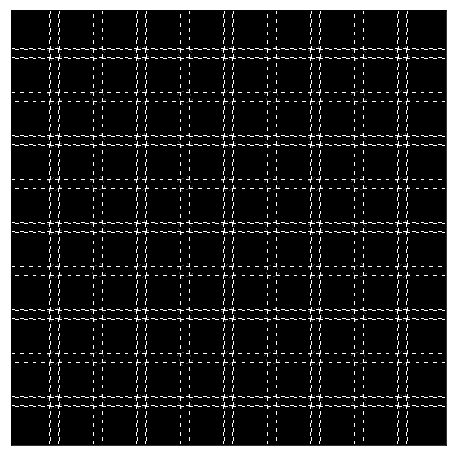

In [6]:
fd, sobel_hog = hog(grad, orientations=8, pixels_per_cell=(12,12), cells_per_block=(1,1), 
                    visualise=True, multichannel=False) 
sobel_hog_rescaled = exposure.rescale_intensity(sobel_hog, in_range=(0,10))

plt.figure(figsize=(8,8))
plt.xticks([]), plt.yticks([])
plt.imshow(sobel_hog_rescaled, cmap='gray')
plt.savefig('Results/7_a_resultado_sobel_hog.png')
plt.show()

# HOG de Sobel

```Python
sobel_x = cv2.Sobel(chess, cv2.CV_64F, 1, 0, ksize=3) # filtro Sobel vertical
sobel_y = cv2.Sobel(chess, cv2.CV_64F, 0, 1, ksize=3) # filtro Sobel horizontal

mag, angle = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)
sobel_x = np.absolute(sobel_x)
sobel_x = np.uint8(sobel_x)
sobel_y = np.absolute(sobel_y)
sobel_y = np.uint8(sobel_y)

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Filtro Sobel Vertical'), plt.xticks([]), plt.yticks([])
plt.imshow(sobel_x, cmap='gray')

plt.subplot(2,2,2)
plt.title('Filtro Sobel Horizontal'), plt.xticks([]), plt.yticks([])
plt.imshow(sobel_y, cmap='gray')

plt.subplot(2,2,3)
plt.title('Histograma Sobel Vertical')
plt.hist(sobel_x.flatten(), 256, (0,255))

plt.subplot(2,2,4)
plt.title('Histograma Sobel Horizontal')
plt.hist(sobel_y.flatten(), 256, (0,255))

plt.savefig('Results/7_sobel_vertical_horizontal.png')
plt.show()
```

b. Histograma do laplaciano.

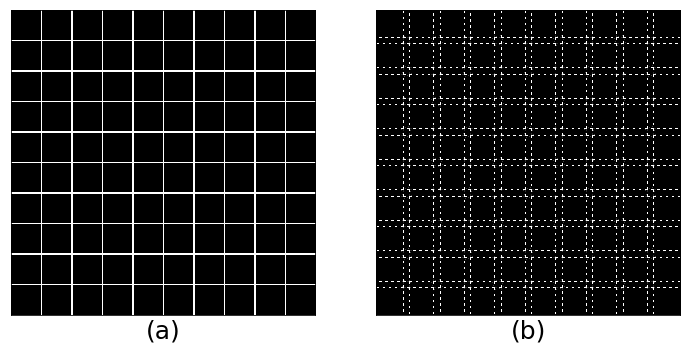

In [7]:
laplacian = cv2.Laplacian(chess, cv2.CV_64F)
laplacian = np.absolute(laplacian)
laplacian = np.uint8(laplacian)

fd, laplacian_hog = hog(laplacian, orientations=8, pixels_per_cell=(12,12), cells_per_block=(1,1), 
                        visualise=True, multichannel=False) 
laplacian_hog_rescaled = exposure.rescale_intensity(laplacian_hog, in_range=(0,10))

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.xlabel('(a)', fontsize=25), plt.xticks([]), plt.yticks([])
plt.imshow(laplacian, cmap='gray')

plt.subplot(1,2,2)
plt.xlabel('(b)', fontsize=25), plt.xticks([]), plt.yticks([])
plt.imshow(laplacian_hog_rescaled, cmap='gray')

plt.savefig('Results/7_b_resultado_laplaciano_e_hog.png')
plt.show()

# (a) - Resultado da aplicação do filtro Laplaciano
# (b) - HOG de Laplaciano

```Python
laplacian = cv2.Laplacian(chess, cv2.CV_64F)
laplacian = np.absolute(laplacian)
laplacian = np.uint8(laplacian)

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.title('Filtro Laplaciano'), plt.xticks([]), plt.yticks([])
plt.imshow(laplacian, cmap='gray')

plt.subplot(2,1,2)
plt.title('Histograma Laplaciano')
plt.hist(laplacian.flatten(), 256, (0,255))

plt.savefig('Results/7_laplaciano.png')
plt.show()
```

### 10. Utilizando uma imagem em tons de cinza a sua escolha:

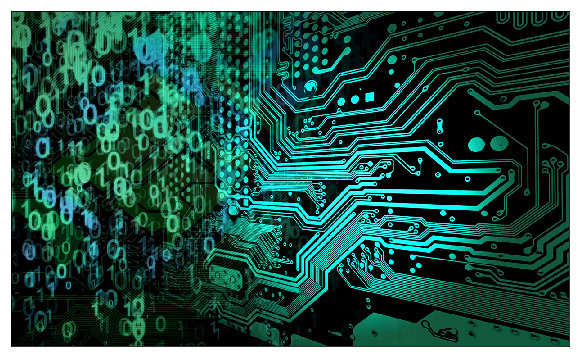

In [8]:
img = cv2.cvtColor(cv2.imread('Images/circuit.jpeg'), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.savefig('Results/10_original.png')
plt.show()

**10.1 Calcular o espectro de Fourier**

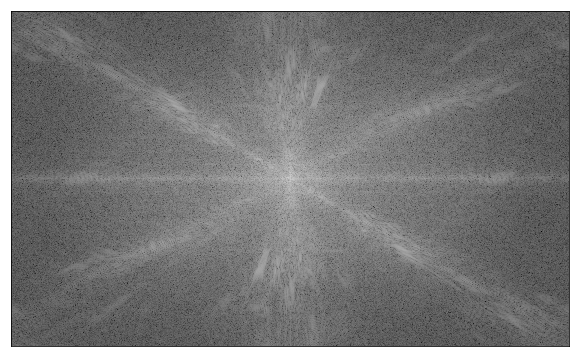

In [9]:
# Tranformada de Fourier (FFT)
fft2_img = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(fft2_img) # Espectro

# Ajustando o contraste para vizualização do espectro
P = np.abs(fshift) # P(u,v) = |F(u,v)|^2 = sqrt(Re^2(u,v) + Im^2(u,v))
spectrum = np.log10(P+1) 

plt.figure(figsize=(10,10))
plt.imshow(spectrum, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.savefig('Results/10.1_spectrum.png')
plt.show()

**10.2 Podar as altas freqüências**

In [10]:
def removing_high_feq(spectrum, radius):
    """
    Removing the high frequence.
    Low-pass filter
    """
    rows, cols = spectrum.shape
    crow, ccol = int(rows/2), int(cols/2)
    circle = cv2.circle(np.zeros((rows,cols)),(ccol,crow), radius, (255,255,255), -1)
    return circle*spectrum

In [11]:
R = 50
rows, cols = spectrum.shape

# Filtro passa baixa
spectrum_low_pass = removing_high_feq(fshift, R)

# Tranformada de Fourier Inversa (IFFT)
f_ishift = np.fft.ifftshift(spectrum_low_pass)
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

# Ajustando o contraste para vizualização do espectro
P = np.abs(spectrum_low_pass) # P(u,v) = |F(u,v)|^2 = sqrt(Re^2(u,v) + Im^2(u,v))
magnitude_spectrum = 20*np.log(P)
for i in range(rows):
    for j in range(cols):
        if magnitude_spectrum[i][j] == -np.inf:
            magnitude_spectrum[i][j] = 255

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


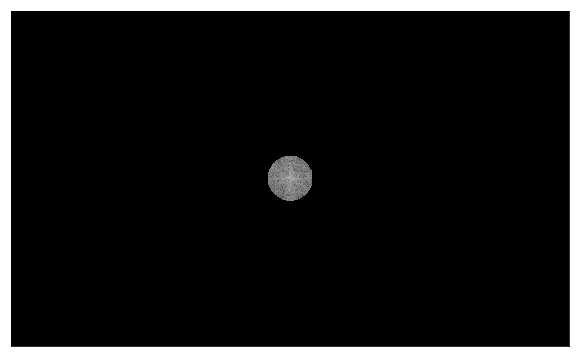

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.savefig('Results/10.2_low_pass.png')
plt.show()

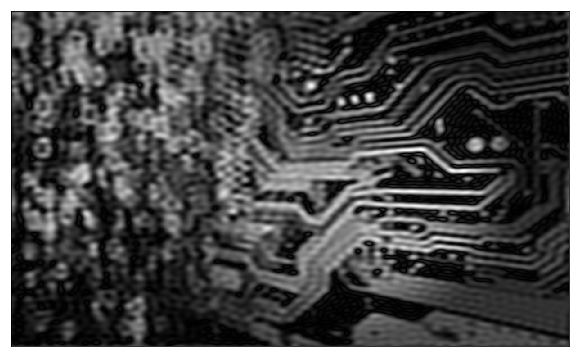

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(img_back, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.savefig('Results/10.2_result_low_pass.png')
plt.show()

**10.3 Podar as baixas freqüências**

In [14]:
def removing_low_feq(spectrum, radius):
    """
    Removing the low frequence.
    High-pass filter
    """
    rows, cols = spectrum.shape
    crow, ccol = int(rows/2), int(cols/2)
    circle = cv2.circle(np.ones((rows,cols)),(ccol,crow), radius, (0,0,0), -1)
    return spectrum*circle

In [15]:
R = 50
rows, cols = spectrum.shape

# Filtro passa alta
spectrum_high_pass = removing_low_feq(fshift, R)

# Tranformada de Fourier Inversa (IFFT)
f_ishift = np.fft.ifftshift(spectrum_high_pass)
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

 # Ajustando o contraste para vizualização do espectro
P = np.abs(spectrum_high_pass) # P(u,v) = |F(u,v)|^2 = sqrt(Re^2(u,v) + Im^2(u,v))
magnitude_spectrum = np.log10(P+100)

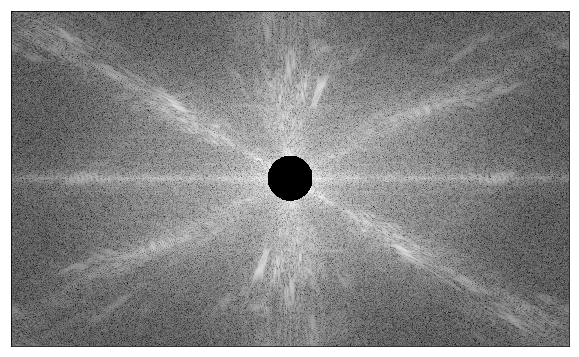

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.savefig('Results/10.3_high_pass.png')
plt.show()

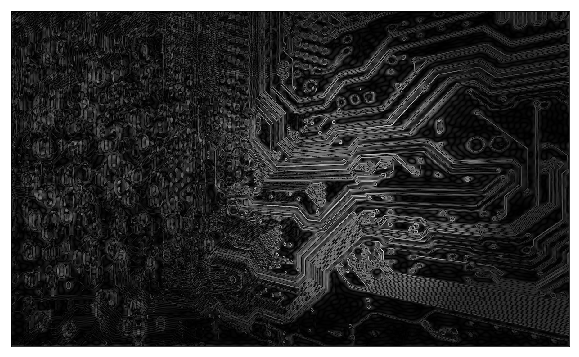

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(img_back, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.savefig('Results/10.3_result_high_pass.png')
plt.show()

**10.4 Aplicar o filtro da média**

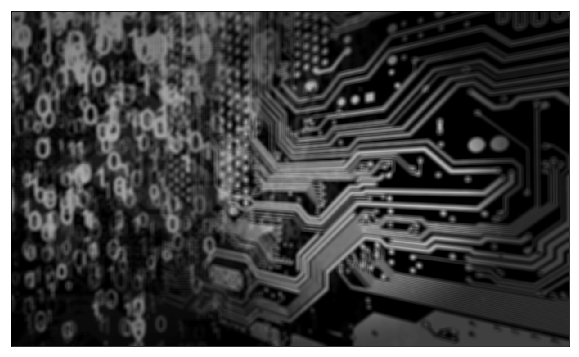

In [18]:
''' 
# Average filter
l = 10
kernel = np.ones((l,l), dtype=np.float32)/(l*l)
smoothing = cv2.filter2D(img_gray, -1, kernel)
or 
smoothing = cv2.blur(img_gray, (10,10))
'''
smoothing = cv2.blur(img_gray, (10,10)) # Average filter

plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(smoothing, cmap='gray', norm=NoNorm())
plt.savefig('Results/10.4_average_filter.png')
plt.show()

**10.5 Aplicar o filtro da mediana**

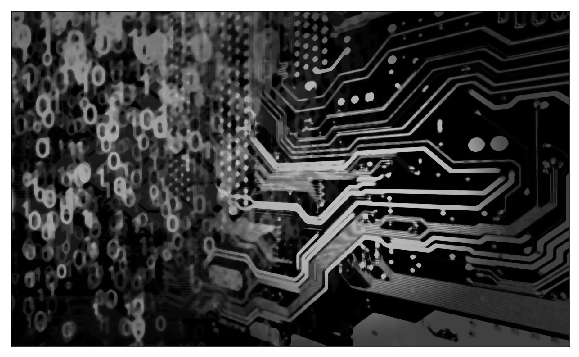

In [19]:
smoothing = cv2.medianBlur(img_gray, 9) # Median filter

plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(smoothing, cmap='gray', norm=NoNorm())
plt.savefig('Results/10.5_median_filter.png')
plt.show()

**10.6 Aplicar o filtro Sobel**

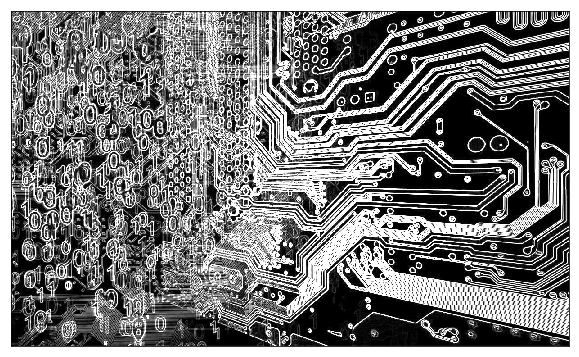

In [20]:
_, _, grad = Sobel_filter(img_gray)

plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(grad, cmap='gray', norm=NoNorm())
plt.savefig('Results/10.6_Sobel_filter.png')
plt.show()

**10.7 Calcular a direção do gradiente em cada ponto**

In [21]:
def img_grad(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) 
    grad = cv2.add(grad_x,grad_y)
    mag, _ = cv2.cartToPolar(grad_x, grad_y, angleInDegrees=True)
    
    return mag, grad

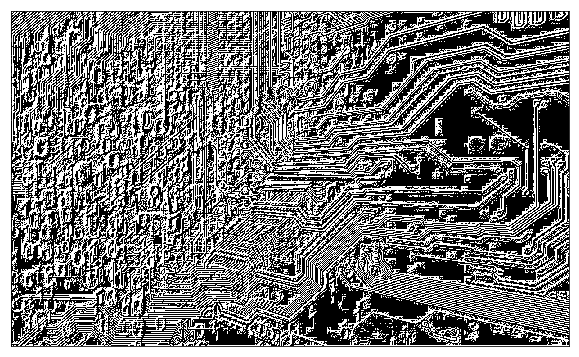

In [22]:
mag, grad = img_grad(img_gray)

plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(grad, cmap='gray', norm=NoNorm())
plt.savefig('Results/10.7_gradient.png')
plt.show()

**10.8 Calcular o valor absoluto do gradiente em cada ponto**

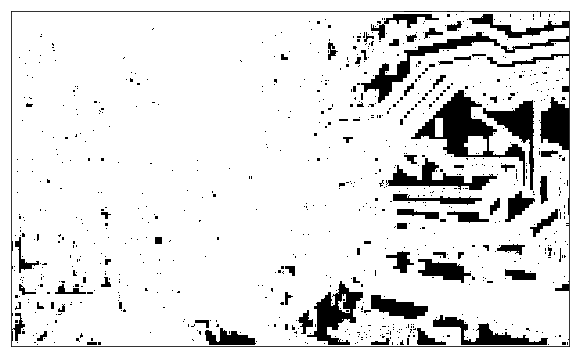

In [23]:
plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(mag, cmap='gray', norm=NoNorm())
plt.savefig('Results/10.8_abs_gradient.png')
plt.show()

**10.9 Criar um filtro gaussiano e suavizar**

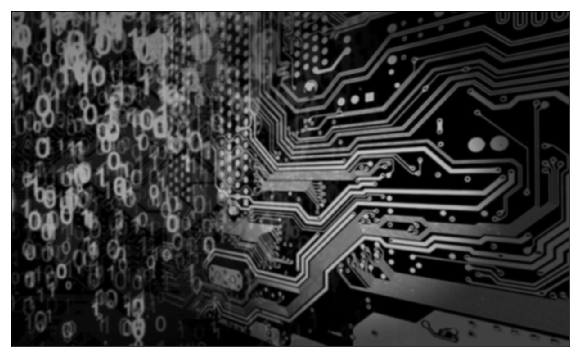

In [24]:
sigma = 2
smoothing = cv2.GaussianBlur(img_gray, (9,9), sigma) # Gaussian filter

plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(smoothing, cmap='gray', norm=NoNorm())
plt.savefig('Results/10.9_gaussian_filter.png')
plt.show()

---